## Observations and Insights 

In [72]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st
from scipy import stats
import numpy as np

# Study data files
mouse_metadata_path = "data/Mouse_metadata.csv"
study_results_path = "data/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)

# Combine the data into a single dataset

# Display the data table for preview
combined_results_df = pd.merge(mouse_metadata, study_results,
                                 how="inner", on="Mouse ID")
combined_results_df


,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1
...,...,...,...,...,...,...,...,...
1888,z969,Naftisol,Male,9,30,25,63.145652,2
1889,z969,Naftisol,Male,9,30,30,65.841013,3
1890,z969,Naftisol,Male,9,30,35,69.176246,4
1891,z969,Naftisol,Male,9,30,40,70.314904,4


In [73]:
# Checking the number of mice.
combined_results_df.count()


Mouse ID              1893
Drug Regimen          1893
Sex                   1893
Age_months            1893
Weight (g)            1893
Timepoint             1893
Tumor Volume (mm3)    1893
Metastatic Sites      1893
dtype: int64

In [100]:
# Getting the duplicate mice by ID number that shows up for Mouse ID and Timepoint. 

duplicateRowsDF = combined_results_df[combined_results_df.duplicated(["Mouse ID", "Timepoint"])]

duplicateRowsDF


,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
909,g989,Propriva,Female,21,26,0,45.000000,0
911,g989,Propriva,Female,21,26,5,47.570392,0
913,g989,Propriva,Female,21,26,10,49.880528,0
915,g989,Propriva,Female,21,26,15,53.442020,0
917,g989,Propriva,Female,21,26,20,54.657650,1


In [75]:
# Optional: Get all the data for the duplicate mouse ID. 

In [101]:
# Create a clean DataFrame by dropping the duplicate mouse by its ID.

final_data_df = combined_results_df.drop_duplicates(subset="Mouse ID")
final_data_df

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.0,0
10,s185,Capomulin,Female,3,17,0,45.0,0
20,x401,Capomulin,Female,16,15,0,45.0,0
30,m601,Capomulin,Male,22,17,0,45.0,0
40,g791,Ramicane,Male,11,16,0,45.0,0
...,...,...,...,...,...,...,...,...
1858,z314,Stelasyn,Female,21,28,0,45.0,0
1860,z435,Propriva,Female,12,26,0,45.0,0
1863,z581,Infubinol,Female,24,25,0,45.0,0
1873,z795,Naftisol,Female,13,29,0,45.0,0


In [77]:
# Checking the number of mice in the clean DataFrame.

final_data_df.count()

Mouse ID              249
Drug Regimen          249
Sex                   249
Age_months            249
Weight (g)            249
Timepoint             249
Tumor Volume (mm3)    249
Metastatic Sites      249
dtype: int64

## Summary Statistics

In [78]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM 
# of the tumor volume for each regimen

# Using the aggregation method, produce the same summary statistics in a single line




In [105]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the 
# tumor volume for each regimen

drug_groups_df= combined_results_df.groupby("Drug Regimen")

t_mean = drug_groups_df["Tumor Volume (mm3)"].mean()

t_median = drug_groups_df["Tumor Volume (mm3)"].median()

t_var=drug_groups_df["Tumor Volume (mm3)"].var()

t_stdev = drug_groups_df["Tumor Volume (mm3)"].std()

t_sem = drug_groups_df["Tumor Volume (mm3)"].sem()


# Use groupby and summary statistical methods to calculate the following properties of each drug regimen: 
# mean, median, variance, standard deviation, and SEM of the tumor volume. 
# Assemble the resulting series into a single summary dataframe.

drug_summary_df = pd.DataFrame({"Mean Tumor Volume": t_mean, "Median Tumor Volume": t_median,
                                   "Tumor Volume Std Dev": t_stdev, "Tumor Volume Std Err": t_sem})

drug_summary_df




,Mean Tumor Volume,Median Tumor Volume,Tumor Volume Std Dev,Tumor Volume Std Err
Drug Regimen,,,,
Capomulin,40.675741,41.557809,4.994774,0.329346
Ceftamin,52.591172,51.776157,6.268188,0.469821
Infubinol,52.884795,51.820584,6.567243,0.492236
Ketapril,55.235638,53.698743,8.279709,0.603860
Naftisol,54.331565,52.509285,8.134708,0.596466
Placebo,54.033581,52.288934,7.821003,0.581331
Propriva,52.322552,50.854632,6.507770,0.512884
Ramicane,40.216745,40.673236,4.846308,0.320955
Stelasyn,54.233149,52.431737,7.710419,0.573111


In [106]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen
agg_drug_df= combined_results_df.groupby("Drug Regimen")

summary_stats_agg = agg_drug_df.agg(['mean','median','var', 'std', 'sem'])["Tumor Volume (mm3)"]
summary_stats_agg

,mean,median,var,std,sem
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.322552,50.854632,42.351070,6.507770,0.512884
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


## Bar and Pie Charts

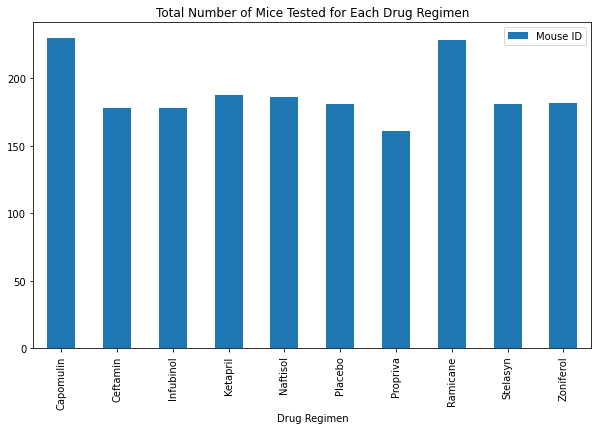

<Figure size 432x288 with 0 Axes>

In [107]:
# Generate a bar plot showing the total number of timepoints for all mice tested for each drug regimen using Pandas.

timepoint= pd.DataFrame(combined_results_df.groupby(["Drug Regimen"]).count()).reset_index()

timepoint_df = timepoint[["Drug Regimen", "Mouse ID"]]

timepoint_df = timepoint_df.set_index("Drug Regimen")


timepoint_df.plot(kind="bar", figsize=(10,6))

plt.title("Total Number of Mice Tested for Each Drug Regimen")
plt.show()
plt.tight_layout()


Text(0.5, 0, 'Drug Regimen')

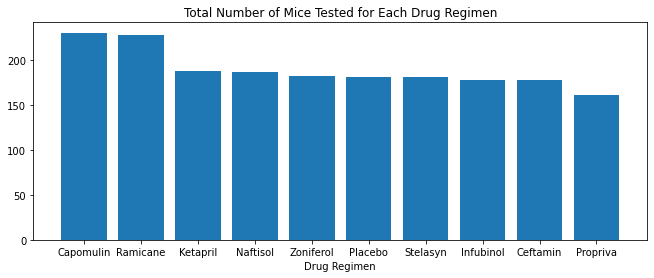

In [108]:
# Generate a bar plot showing the total number of timepoints for all mice tested for each drug regimen using pyplot.

drugs_count= combined_results_df["Drug Regimen"].value_counts()

x_axis = np.arange(len(drugs_count))


plt.figure(figsize=(11,4))
plt.bar(x_axis, drugs_count)

tick_locations = [value for value in x_axis]
plt.xticks(tick_locations, drugs_count.index.values)

plt.title("Total Number of Mice Tested for Each Drug Regimen")
plt.xlabel("Drug Regimen")


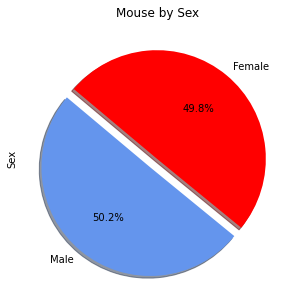

In [109]:
# Generate a pie plot showing the distribution of female versus male mice using Pandas

mouse_sex= final_data_df["Sex"].value_counts()
mouse_sex

colors = ["cornflowerblue", "red"]
explode = (0.1, 0)

plot = mouse_sex.plot.pie(title= "Mouse by Sex", figsize=(5,5), colors = colors, 
                             startangle=140, explode = explode, shadow = True, autopct="%1.1f%%") 

(-1.1762367126898932,
 1.1254463310846248,
 -1.190308764526366,
 1.124996700756096)

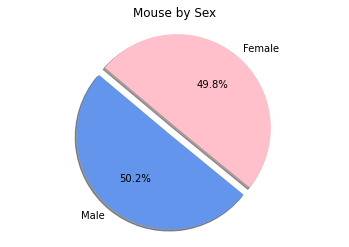

In [110]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot

labels = ["Male","Female"]
colors = ["cornflowerblue", "pink"]
explode = (0.1, 0)

# Tell matplotlib to create a pie chart based upon the above data
plt.pie(mouse_sex, explode=explode, labels=labels, colors=colors,
        autopct="%1.1f%%", shadow=True, startangle=140)

plt.title("Mouse by Sex")

# Create axes which are equal so we have a perfect circle
plt.axis("equal")

## Quartiles, Outliers and Boxplots

In [111]:
# Calculate the final tumor volume of each mouse across four of the treatment regimens:  
# Capomulin, Ramicane, Infubinol, and Ceftamin

# Start by getting the last (greatest) timepoint for each mouse

# Merge this group df with the original dataframe to get the tumor volume at the last timepoint

greatest_tp_df = pd.DataFrame(combined_results_df.groupby("Mouse ID")["Timepoint"].max().sort_values()).reset_index().rename(columns={'Timepoint': 'max_timepoint'})
greatest_tp_df

# Merge max timepoint onto data_df
merged_tp_df = pd.merge(combined_results_df, greatest_tp_df, on='Mouse ID')
merged_tp_df.head()

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites,max_timepoint
0,k403,Ramicane,Male,21,16,0,45.000000,0,45
1,k403,Ramicane,Male,21,16,5,38.825898,0,45
2,k403,Ramicane,Male,21,16,10,35.014271,1,45
3,k403,Ramicane,Male,21,16,15,34.223992,1,45
4,k403,Ramicane,Male,21,16,20,32.997729,1,45


In [114]:
# Put treatments into a list for for loop (and later for plot labels)
drugs = ["Capomulin", "Ramicane", "Infubinol", "Ceftamin"]
drug_values = []

for drug in drugs:
    
    drug_list_df = merged_tp_df.loc[merged_tp_df["Drug Regimen"] == drug]

    # Create subset dataframes 
    final_tp_df = drug_list_df.loc[drug_list_df["Timepoint"] ==  drug_list_df["max_timepoint"]]
    
    # Create a series for final volume values for each regimen
    tumor_values = final_tp_df["Tumor Volume (mm3)"]
    drug_values.append(tumor_values)
    
    # Calculate and print the interquartile range (IQR) for each regimen
    quartiles = values.quantile([.25,.5,.75])
    lowerq = quartiles[0.25]
    upperq = quartiles[0.75]
    iqr = upperq-lowerq
    print(f'IQR for {drug}: {iqr}')
    
    # Find upper and lower bounds to help identify outliers for each regimen
    lower_bound = lowerq - (1.5*iqr)
    upper_bound = upperq + (1.5*iqr)
    print(f'Lower Bound for {drug}: {lower_bound}')
    print(f'Upper Bound for {drug}: {upper_bound}')
    
    # Quantitatively check for outliers
    outliers_count = (tumor_values.loc[(final_tp_df["Tumor Volume (mm3)"] >= upper_bound) | 
                                        (final_tp_df["Tumor Volume (mm3)"] <= lower_bound)]).count()
    print(f'Number of {drug} outliers: {outliers_count}')

IQR for Capomulin: 15.577752179999997
Lower Bound for Capomulin: 25.355449580000002
Upper Bound for Capomulin: 87.66645829999999
Number of Capomulin outliers: 1
IQR for Ramicane: 15.577752179999997
Lower Bound for Ramicane: 25.355449580000002
Upper Bound for Ramicane: 87.66645829999999
Number of Ramicane outliers: 1
IQR for Infubinol: 15.577752179999997
Lower Bound for Infubinol: 25.355449580000002
Upper Bound for Infubinol: 87.66645829999999
Number of Infubinol outliers: 0
IQR for Ceftamin: 15.577752179999997
Lower Bound for Ceftamin: 25.355449580000002
Upper Bound for Ceftamin: 87.66645829999999
Number of Ceftamin outliers: 0


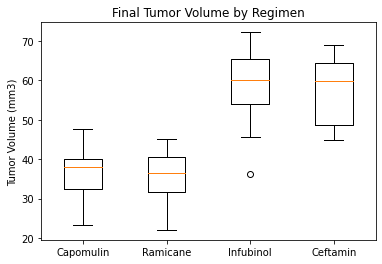

In [115]:
# Generate a box plot of the final tumor volume of each mouse across four regimens of interest

# Plot boxplot
plt.boxplot(drug_values)

# Add title and labels to boxplot
plt.title('Final Tumor Volume by Regimen')
plt.ylabel('Tumor Volume (mm3)')
plt.xticks([1, 2, 3, 4], ['Capomulin', 'Ramicane', 'Infubinol', 'Ceftamin'])

plt.show()


## Line and Scatter Plots

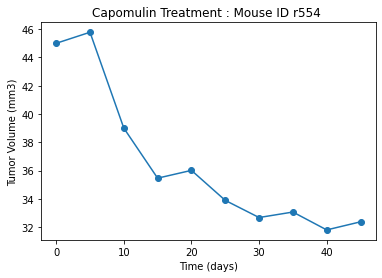

In [116]:
# Generate a line plot of time point versus tumor volume for a mouse treated with Capomulin

# Identify data points of a mouse treated with Capomulin
mouse = combined_results_df.loc[combined_results_df['Mouse ID'] == 'r554']

# Plot a line chart with the time values on the x-axis and the tumor volume values on the y-axis

plt.plot(mouse['Timepoint'], mouse['Tumor Volume (mm3)'], marker = 'o')

# Add labels and title to plot
plt.xlabel("Time (days)")
plt.ylabel("Tumor Volume (mm3)")
plt.title("Capomulin Treatment : Mouse ID r554 ")

# Display plot
plt.show()

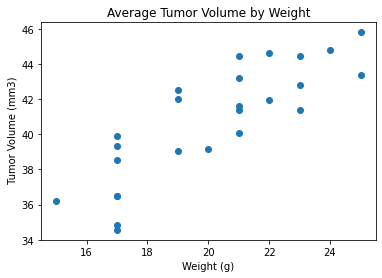

In [117]:
# Generate a scatter plot of mouse weight versus average tumor volume for the Capomulin regimen

# Isolate cases that only use the Capomulin regimen
capomulin_df = combined_results_df.loc[combined_results_df['Drug Regimen'] == 'Capomulin']

# Find average tumor volume for each mouse

avg_vol_df = pd.DataFrame(capomulin_df.groupby('Mouse ID')['Tumor Volume (mm3)'].mean().sort_values()).reset_index().rename(columns={'Tumor Volume (mm3)': 'avg_tumor_vol'})

# Merge average tumor volume onto data_df and drop duplicates
avg_vol_df = pd.merge(capomulin_df, avg_vol_df, on='Mouse ID')
final_avg_vol_df = avg_vol_df[['Weight (g)', 'avg_tumor_vol']].drop_duplicates()
final_avg_vol_df

x = final_avg_vol_df['Weight (g)']
y = final_avg_vol_df['avg_tumor_vol']

# Create a scatter plot based on new dataframe above with circle markers and listed colors
plt.scatter(x, y)

# Add labels and title to plot
plt.xlabel("Weight (g)")
plt.ylabel(" Tumor Volume (mm3)")
plt.title('Average Tumor Volume by Weight')
# Display plot
plt.show()

## Correlation and Regression

The correlation between weight and average tumor volume on the Capomulin regimen is 0.84.


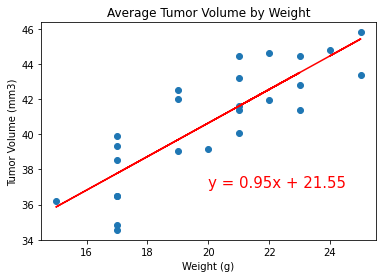

In [118]:
from scipy.stats import linregress

#Code from scatter plot
capomulin_df = combined_results_df.loc[combined_results_df['Drug Regimen'] == 'Capomulin']
avg_vol_df = pd.DataFrame(capomulin_df.groupby('Mouse ID')['Tumor Volume (mm3)'].mean().sort_values()).reset_index().rename(columns={'Tumor Volume (mm3)': 'avg_tumor_vol'})
avg_vol_df = pd.merge(capomulin_df, avg_vol_df, on='Mouse ID')
final_avg_vol_df = avg_vol_df[['Weight (g)', 'avg_tumor_vol']].drop_duplicates()
final_avg_vol_df
x = final_avg_vol_df['Weight (g)']
y = final_avg_vol_df['avg_tumor_vol']

# Calculate the correlation coefficient between mouse weight and average tumor volume
correlation = st.pearsonr(x,y)

# Print the answer to above calculation
print(f"""The correlation between weight and average tumor volume on the Capomulin regimen is {round(correlation[0],2)}.""")

# Calculate linear regression
(slope, intercept, rvalue, pvalue, stderr) = linregress(x, y)
regress_values = x * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

# Plot linear regression on top of scatter plot
plt.scatter(x,y)
plt.plot(x,regress_values,"r-")

# Annotate linear regression
plt.annotate(line_eq,(20,37),fontsize=15,color="red")

# Add labels and title to plot
plt.xlabel("Weight (g)")
plt.ylabel("Tumor Volume (mm3)")
plt.title('Average Tumor Volume by Weight')
plt.show()